        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

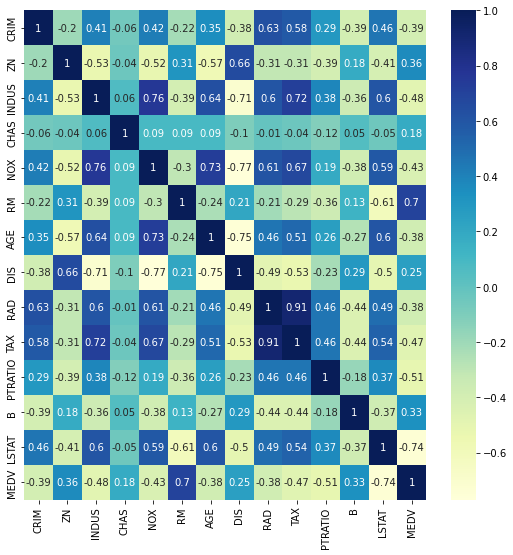

[[0.00000000e+00 9.00000000e-01 3.39076246e-01 ... 1.43617021e+00
  5.00000000e+00 4.48399558e-01]
 [1.17961270e-03 0.00000000e+00 1.21151026e+00 ... 2.76595745e+00
  5.00000000e+00 1.02235099e+00]
 [1.17848872e-03 0.00000000e+00 1.21151026e+00 ... 2.76595745e+00
  4.94868627e+00 3.17328918e-01]
 ...
 [3.05946237e-03 0.00000000e+00 2.10227273e+00 ... 4.46808511e+00
  5.00000000e+00 5.39459161e-01]
 [5.80364950e-03 0.00000000e+00 2.10227273e+00 ... 4.46808511e+00
  4.95650310e+00 6.55353201e-01]
 [2.30920846e-03 0.00000000e+00 2.10227273e+00 ... 4.46808511e+00
  5.00000000e+00 8.48509934e-01]]
                0
CRIM    -2.736288
ZN       1.300319
INDUS   -0.132361
CHAS     0.324407
NOX     -1.487153
RM       3.498783
AGE      0.219951
DIS     -3.404879
RAD      1.392153
TAX     -1.281888
PTRATIO -1.525693
B        1.027180
LSTAT   -3.949157
[[31.4243217 ]
 [31.96785487]
 [30.93785448]
 [22.34313349]
 [18.83846235]]
MAE: 3.707
MSE: 29.327
RMSE: 5.415
R_Squared: 0.7


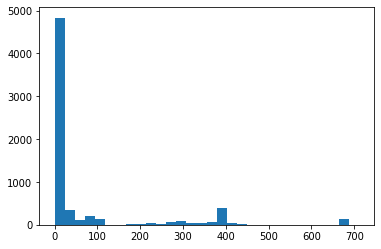

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#보스턴 집 값 데이터 불러오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"        # 가져오고 싶은 url 링크
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df      # 데이터 전처리가 안된 값

#hstack 수평으로 값을 stack
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #독립변수 13개  law 데이터가 다음행 1열까지 위치 하고 있으므로 제대로 값을 보기위해 열을 13개로 만듦.    # 독립변수는 스스로가 정하고 여기서의 독립변수는 상황(국가가 다름)등에 따라서 다름.
y = raw_df.values[1::2, 2] #종속변수: 본인 소유 주택가격(중앙값)
y = y.reshape(-1,1)
#변수명 지정
feature_names = np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM', 'AGE','DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT'])
X_data = pd.DataFrame(data=X,columns=feature_names) # 데이터 프레임 생성
print(X_data)

import seaborn as sns # 시각화 라이브러리   #변수간의 상관관계를 살펴보기 용이함.

raw_data = pd.DataFrame(data=np.hstack([X,y]), columns=np.append(feature_names, 'MEDV'))
#correlation_matrix 판다스에서 기본 제공함.
correlation_matrix = raw_data.corr().round(2)
plt.subplots(figsize=(9,9))  
sns.heatmap(data=correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

import matplotlib.pyplot as plt 
plt.hist(X.flatten(), bins=30); #독립변수 데이터분포 살펴보기


### 데이터 편향을 피하기 위해서 scaling을 적용함 ###

from sklearn.preprocessing import MinMaxScaler     # 정규화를 통한 높이를 맞추는 함수를 임포트함.

minmax_scale = MinMaxScaler(feature_range=(0,5)).fit(X) #min:0, max:5
X_scaled = minmax_scale.transform(X) #feature scaling을 적용한 독립변수
print(X_scaled)  

### 학습 데이터 및 테스트 데이터로 분류 ###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


### 단순 선형회귀 OLS method ###
from sklearn.linear_model import LinearRegression       # 선형회귀를 위한 import        선형회귀 OLS:Ordinary Least Square

ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train) #학습데이터를 통하여 선형모델 생성

# print('Coefficients(계수): ', ols_reg.coef_)
# print('Intercept(절편): ', ols_reg.intercept_)

ols_df = pd.DataFrame(ols_reg.coef_, columns=feature_names) # columns 독립 변수 이름
print(ols_df.T)

y_pred_ols = ols_reg.predict(X_test) #테스트데이터로 예측수행 
print(y_pred_ols[:5])

X_test[:5].dot(ols_reg.coef_.T) + ols_reg.intercept_ 


#성능평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', round(mean_absolute_error(y_test,y_pred_ols),3))
print('MSE:', round(mean_squared_error(y_test,y_pred_ols),3)) 
print('RMSE:', round(mean_squared_error(y_test,y_pred_ols,squared=False),3))
print('R_Squared:', round(r2_score(y_test,y_pred_ols),3))


MAE: 3.707
MSE: 29.327
RMSE: 5.415
R_Squared: 0.7


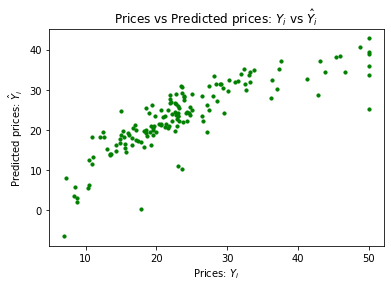

In [2]:
#성능평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', round(mean_absolute_error(y_test,y_pred_ols),3))
print('MSE:', round(mean_squared_error(y_test,y_pred_ols),3)) 
print('RMSE:', round(mean_squared_error(y_test,y_pred_ols,squared=False),3))
print('R_Squared:', round(r2_score(y_test,y_pred_ols),3))


plt.scatter(y_test, y_pred_ols, s=10, c='green')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$") 
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Lasso Regression

In [3]:
from sklearn.linear_model import Lasso      # Lasso 사이킷런       다중 선형회귀 
import numpy as np

# initialize
alphas = np.arange(0, 1, 0.01)    # Lasso는 필요 없는 값들은 0으로 만듦.
lasso_df = pd.DataFrame(np.zeros(shape=(len(alphas),len(feature_names))), columns=feature_names)

lasso_train_pred = []
lasso_test_pred = []
index_name = []

for i in range(len(alphas)):
    lasso_reg = Lasso(alpha=alphas[i])
    lasso_reg.fit(X_train, y_train)
    index_name.append('alpha' + str(alphas[i]))
    lasso_df.loc[i] = lasso_reg.coef_
    # prediction
    lasso_train_pred.append(lasso_reg.predict(X_train))
    lasso_test_pred.append(lasso_reg.predict(X_test))

lasso_df






C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-2.736288,1.300319,-0.132361,0.324407,-1.487153,3.498783,0.219951,-3.404879,1.392153,-1.281888,-1.525693,1.027180,-3.949157
1,-2.636812,1.273453,-0.128772,0.323532,-1.441829,3.508217,0.197888,-3.342303,1.341859,-1.245412,-1.516130,1.021314,-3.945075
2,-2.537332,1.246435,-0.124907,0.322656,-1.396583,3.517881,0.175672,-3.279524,1.291652,-1.209036,-1.506663,1.015496,-3.940825
3,-2.437930,1.219406,-0.121031,0.321782,-1.351454,3.527567,0.153424,-3.216810,1.241505,-1.172681,-1.497228,1.009681,-3.936504
4,-2.338507,1.192357,-0.117136,0.320911,-1.306325,3.537287,0.131155,-3.154075,1.191339,-1.136309,-1.487797,1.003869,-3.932163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.000000,0.000000,-0.000000,0.000000,-0.000000,2.427580,-0.000000,-0.000000,-0.000000,-0.210393,-1.224637,0.392518,-3.915786
96,-0.000000,0.000000,-0.000000,0.000000,-0.000000,2.402865,-0.000000,-0.000000,-0.000000,-0.212308,-1.221342,0.384941,-3.917556
97,-0.000000,0.000000,-0.000000,0.000000,-0.000000,2.378150,-0.000000,-0.000000,-0.000000,-0.214223,-1.218047,0.377364,-3.919326
98,-0.000000,0.000000,-0.000000,0.000000,-0.000000,2.353435,-0.000000,-0.000000,-0.000000,-0.216137,-1.214752,0.369787,-3.921097


In [4]:
lasso_df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
CRIM,-2.736288,-2.636812,-2.537332,-2.437930,-2.338507,-2.239071,-2.139838,-2.040606,-1.941376,-1.841962,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
ZN,1.300319,1.273453,1.246435,1.219406,1.192357,1.165290,1.138305,1.111320,1.084336,1.057266,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
INDUS,-0.132361,-0.128772,-0.124907,-0.121031,-0.117136,-0.113229,-0.109396,-0.105563,-0.101732,-0.097826,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
CHAS,0.324407,0.323532,0.322656,0.321782,0.320911,0.320042,0.319166,0.318290,0.317413,0.316545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NOX,-1.487153,-1.441829,-1.396583,-1.351454,-1.306325,-1.261207,-1.216246,-1.171285,-1.126328,-1.081245,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.498783,3.508217,3.517881,3.527567,3.537287,3.547037,3.556657,3.566276,3.575894,3.585651,...,2.551155,2.526440,2.501725,2.477010,2.452295,2.427580,2.402865,2.378150,2.353435,2.328721
AGE,0.219951,0.197888,0.175672,0.153424,0.131155,0.108866,0.086630,0.064394,0.042158,0.019860,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
DIS,-3.404879,-3.342303,-3.279524,-3.216810,-3.154075,-3.091330,-3.028777,-2.966224,-2.903675,-2.840954,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
RAD,1.392153,1.341859,1.291652,1.241505,1.191339,1.141157,1.091146,1.041135,0.991125,0.940958,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
TAX,-1.281888,-1.245412,-1.209036,-1.172681,-1.136309,-1.099919,-1.063636,-1.027353,-0.991069,-0.954681,...,-0.200820,-0.202734,-0.204649,-0.206564,-0.208479,-0.210393,-0.212308,-0.214223,-0.216137,-0.218052


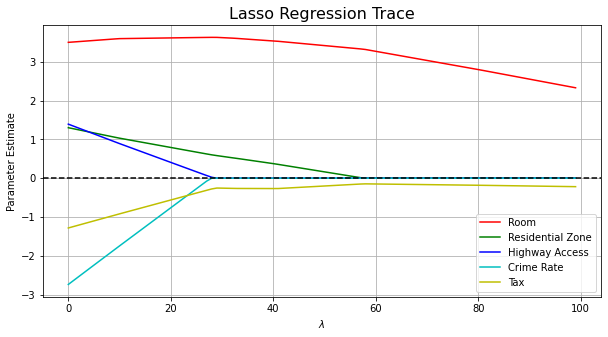

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.RM, 'r', lasso_df.ZN, 'g', lasso_df.RAD, 'b', lasso_df.CRIM, 'c', lasso_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Parameter Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True);

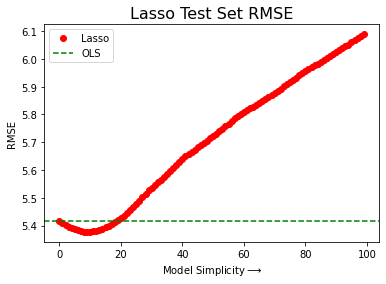

In [6]:
# 에러 값
lasso_rmse_test = [mean_squared_error(y_test, p, squared=False) for p in lasso_test_pred]
ols_rmse = mean_squared_error(y_test, y_pred_ols, squared=False)

# plot RMSE
plt.plot(lasso_rmse_test, 'ro')
plt.axhline(y=ols_rmse, color='g', linestyle='--')
plt.title("Lasso Test Set RMSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("RMSE")
plt.legend(['Lasso', 'OLS']);

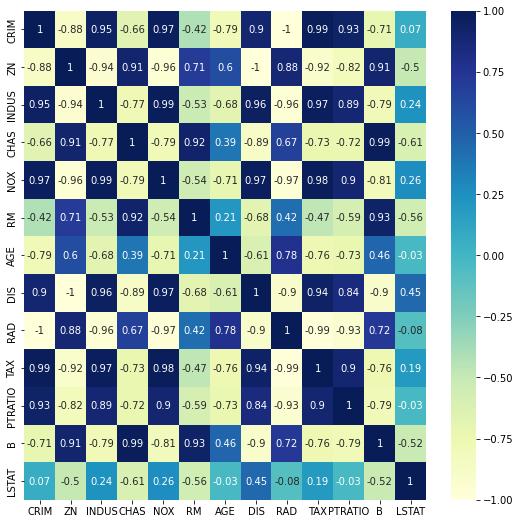

In [7]:
#Lasso

import seaborn as sns # 시각화 라이브러리   #변수간의 상관관계를 살펴보기 용이함.

raw_data = pd.DataFrame(data=np.hstack([X,y]), columns=np.append(feature_names, 'MEDV'))
#correlation_matrix 판다스에서 기본 제공함.
correlation_matrix = lasso_df.corr().round(2)
plt.subplots(figsize=(9,9))  
sns.heatmap(data=correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()
